In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PSID
from PSID.evaluation import evalPrediction
from src.cross_validation_PSID import cross_validation, cross_validation_split
from src.explore_state_dimensions import plot_explorations
from src.explore_state_dimensions import explore_latent_behavior_dims
from train_PSID import train, plot_movement_pred
%load_ext autoreload
%autoreload 2

In [2]:
PATH_FEATURES = "/home/lauraflyra/Documents/BCCN/Lab_Rotation_USC/Code/Data/py_neuromodulation_derivatives/sub-000_ses-right_task-force_run-3/sub-000_ses-right_task-force_run-3_FEATURES.csv"
data_features = pd.read_csv(PATH_FEATURES, index_col=0)

In [3]:
feature_df_bandpass = pd.concat([data_features.filter(like='STN'),data_features.filter(like='ECOG')], axis = 1).filter(like='bandpass_activity').to_numpy()
behavior_df = data_features["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [5]:
idSys, mov_features_test_pred, mov_features_test, test_idx_features, eval_result = train(feature_df_bandpass, behavior_df, 5, 5, 30, eval_metrics = "R2", train_whole_data = False)

Behavior decoding r2:
  PSID => 0.607


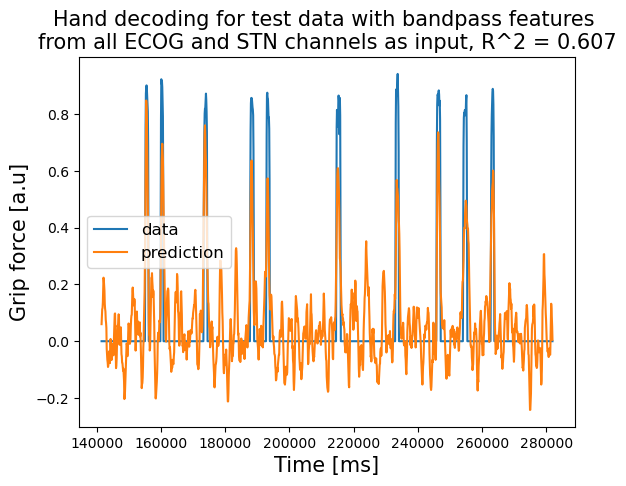

In [6]:
plot_movement_pred(data_features, mov_features_test_pred, mov_features_test, test_idx_features, eval_result)

In [7]:
df = data_features

In [9]:
df['time'].to_numpy().reshape(-1, 1)[test_idx_features]

1405    141500.0
1406    141600.0
1407    141700.0
1408    141800.0
1409    141900.0
          ...   
2805    281500.0
2806    281600.0
2807    281700.0
2808    281800.0
2809    281900.0
Name: time, Length: 1405, dtype: float64

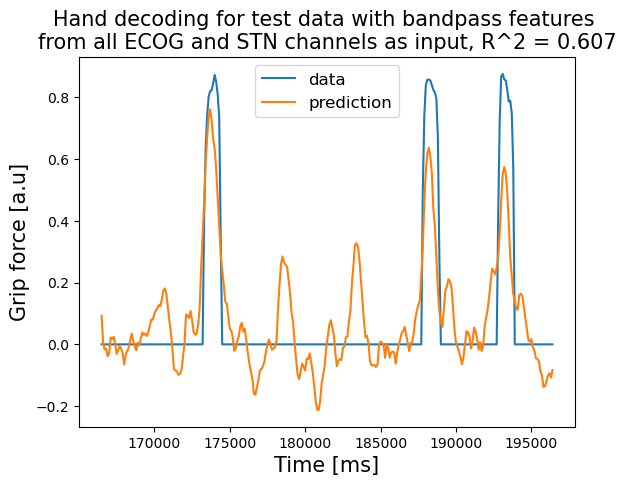

In [12]:
time_array = df['time'].to_numpy().reshape(-1, 1)[test_idx_features]
plt.plot(time_array[250:550], mov_features_test.reshape(-1,)[250:550], label = 'data')
plt.plot(time_array[250:550], mov_features_test_pred.reshape(-1,)[250:550], label = 'prediction')
plt.title("Hand decoding for test data with bandpass features \nfrom all ECOG and STN channels as input, R^2 = {:.3g}".format(np.mean(eval_result)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()